[Logistic Regression Mastering](https://codefinity.com/courses/projects/315d8e6c-5ee5-434a-9a9f-e312510366a0)


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("data.csv")

data.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


**Exploratory Data Analysis**

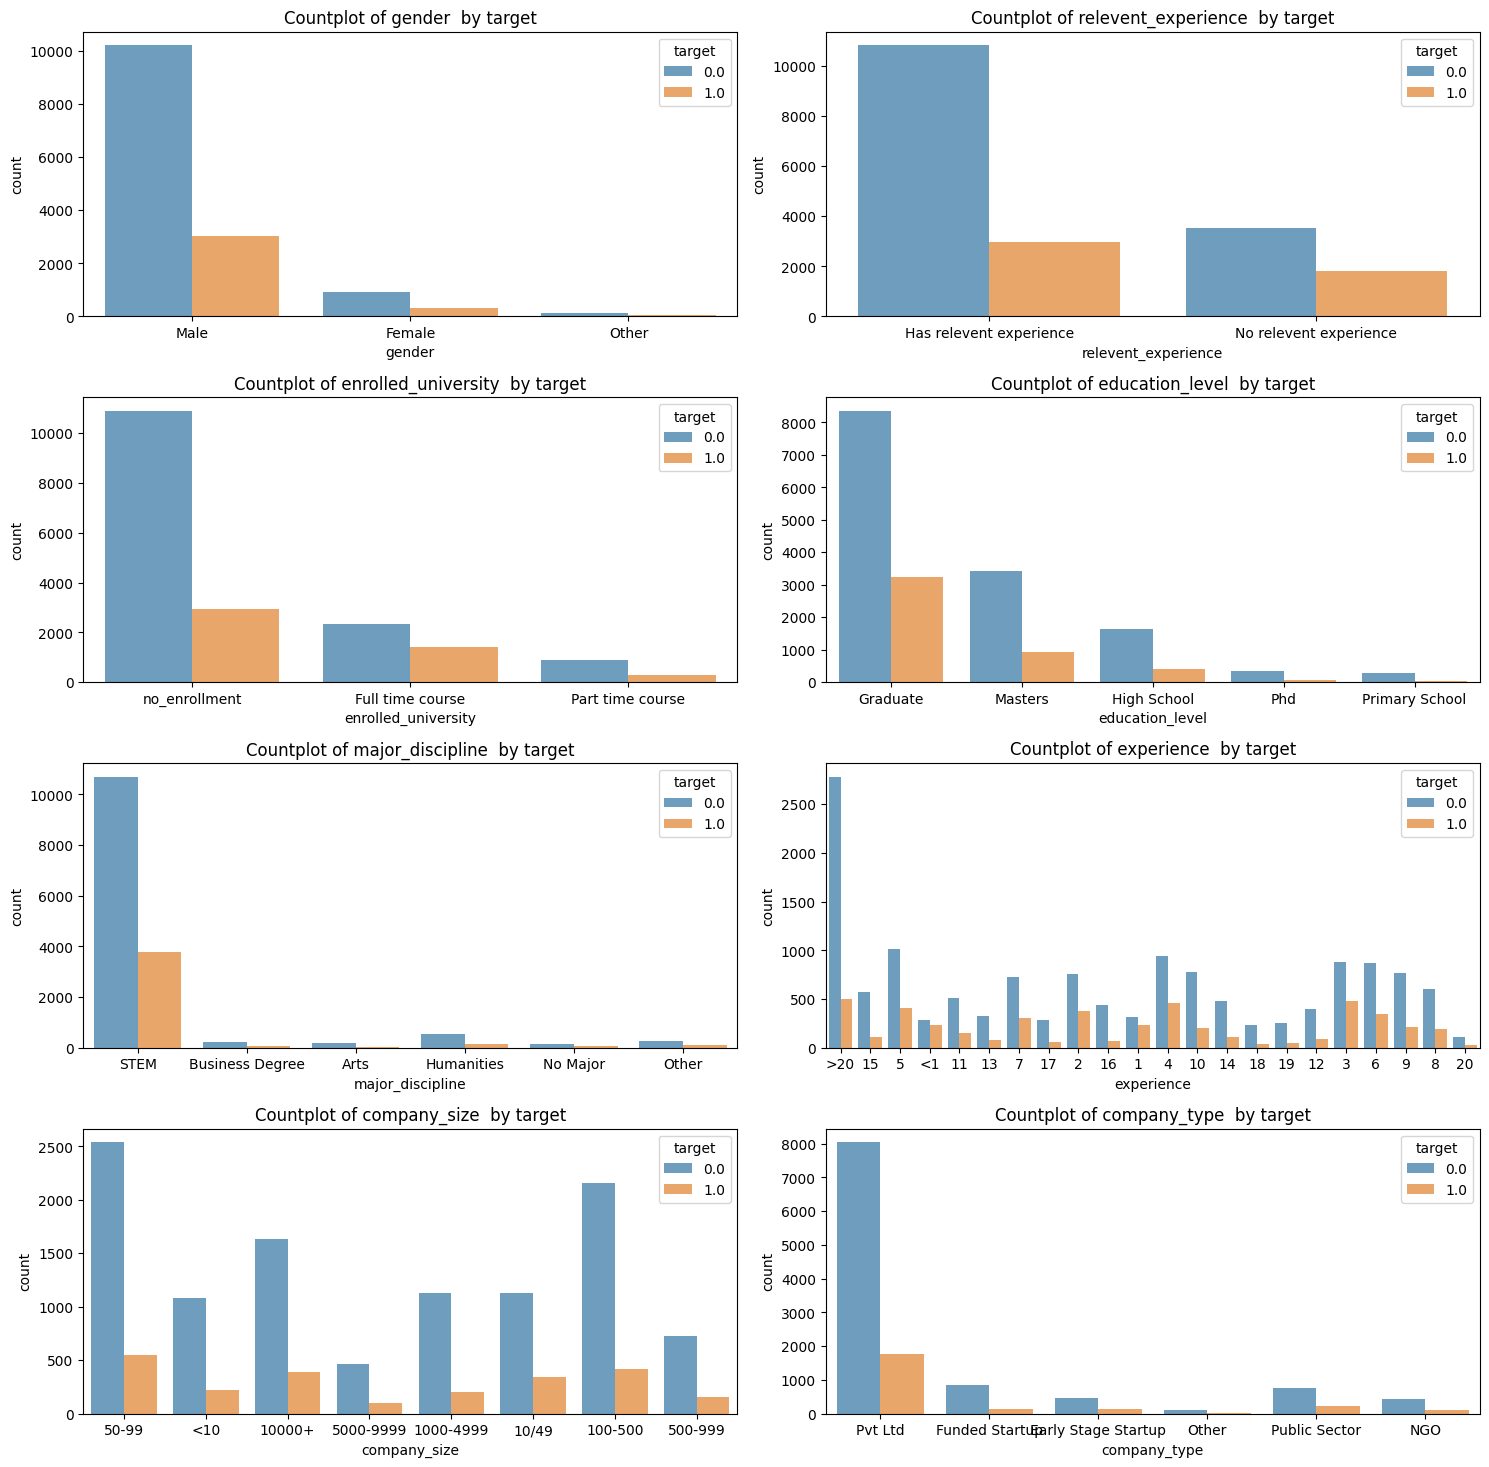

In [60]:

#Frequency of each category separated by label
plt.figure(figsize=[15, 18])
features = ["gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline",
       "experience", "company_size", "company_type"]
n = 1
for f in features:
    plt.subplot(5, 2, n)
    sns.countplot(x=f, hue="target", alpha=0.7, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n = n + 1

plt.tight_layout()
plt.show()

**Data Preprocessing**

In [61]:
from sklearn import preprocessing


le = preprocessing.LabelEncoder()

# Remove duplicates
data = data.drop_duplicates()

# Imput the numerical missing values with the median and the categorical with the mode
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = data.select_dtypes(exclude=["int64", "float64"]).columns

for col in numerical_columns:
 data[col] = data[col].fillna(data[col].mean())


for col in categorical_columns:
  data[col] = data[col].fillna(data[col].mode()[0])
  
  # Encode variables
  data[col] = le.fit_transform(data[col])

data.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,1,0,2,0,5,21,4,5,0,36,1.0
1,29725,77,0.776,1,1,2,0,5,6,4,5,4,47,0.0
2,11561,64,0.624,1,1,0,0,5,15,4,5,5,83,0.0
3,33241,14,0.789,1,1,2,0,1,20,4,5,5,52,1.0
4,666,50,0.767,1,0,2,2,5,21,4,1,3,8,0.0


**Train and Test Split**

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
X = data.drop("target", axis=1)
y = data["target"]

# Scale the entire feature set before splitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Now, split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)




**Model Training**

In [63]:
from sklearn.linear_model import LogisticRegression




clf = LogisticRegression(solver='lbfgs', max_iter=1000)  # Increase max_iter from the default 100

# clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

**Model Evaluation**

In [64]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, y_pred)



0.7602403922188834